In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import analytics_core_V04 as ac
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from typing import List, Dict, Tuple
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import helper_functions as cf

# Figure 2A

In [3]:
path_used = r'Z:\SPEC\submission\raw\figure2'

experiment_dict = [
    {'instrument': '0.25 ng', 'method' : 'In sol', 'file_tags': ['A1', 'A2', 'A3', 'A4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_0p25ng.parquet'},
    {'instrument': '1 ng', 'method' : 'In sol', 'file_tags': ['B1', 'B2', 'B3', 'B4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_1ng.parquet'},
    {'instrument': '5 ng', 'method' : 'In sol', 'file_tags': ['C1', 'C2', 'C3', 'C4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_5ng.parquet'},
    {'instrument': '20 ng', 'method' : 'In sol', 'file_tags': ['D1', 'D2', 'D3', 'D4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_20ng.parquet'},
    {'instrument': '50 ng', 'method' : 'In sol', 'file_tags': ['E1', 'E2', 'E3', 'E4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_50ng.parquet'},
    {'instrument': '200 ng', 'method' : 'In sol', 'file_tags': ['F1', 'F2', 'F3', 'F4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_200ng.parquet'},
    {'instrument': '500 ng', 'method' : 'In sol', 'file_tags': ['G1', 'G2', 'G3', 'G4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_500ng.parquet'},
    {'instrument': '1000 ng', 'method' : 'In sol', 'file_tags': ['H1', 'H2', 'H3', 'H4'], 'path': r'Z:\SPEC\submission\raw\figure2\InSol_1000ng.parquet'},
    {'instrument': '0.25 ng', 'method' : 'PAC', 'file_tags': ['A9', 'A10', 'A11', 'A12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_0p25ng.parquet'},
    {'instrument': '1 ng', 'method' : 'PAC', 'file_tags': ['B9', 'B10', 'B11', 'B12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_1ng.parquet'},
    {'instrument': '5 ng', 'method' : 'PAC', 'file_tags': ['C9', 'C10', 'C11', 'C12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_5ng.parquet'},
    {'instrument': '20 ng', 'method' : 'PAC', 'file_tags': ['D9', 'D10', 'D11', 'D12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_20ng.parquet'},
    {'instrument': '50 ng', 'method' : 'PAC', 'file_tags': ['E9', 'E10', 'E11', 'E12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_50ng.parquet'},
    {'instrument': '200 ng', 'method' : 'PAC', 'file_tags': ['F9', 'F10', 'F11', 'F12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_200ng.parquet'},
    {'instrument': '500 ng', 'method' : 'PAC', 'file_tags': ['G9', 'G10', 'G11', 'G12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_500ng.parquet'},
    {'instrument': '1000 ng', 'method' : 'PAC', 'file_tags': ['H9', 'H10', 'H11', 'H12'], 'path': r'Z:\SPEC\submission\raw\figure2\PAC_1000ng.parquet'},
    {'instrument': '0.25 ng', 'method' : 'SPEC', 'file_tags': ['A5', 'A6', 'A7', 'A8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_0p25ng.parquet'},
    {'instrument': '1 ng', 'method' : 'SPEC', 'file_tags': ['B5', 'B6', 'B7', 'B8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_1ng.parquet'},
    {'instrument': '5 ng', 'method' : 'SPEC', 'file_tags': ['C5', 'C6', 'C7', 'C8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_5ng.parquet'},
    {'instrument': '20 ng', 'method' : 'SPEC', 'file_tags': ['D5', 'D6', 'D7', 'D8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_20ng.parquet'},
    {'instrument': '50 ng', 'method' : 'SPEC', 'file_tags': ['E5', 'E6', 'E7', 'E8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_50ng.parquet'},
    {'instrument': '200 ng', 'method' : 'SPEC', 'file_tags': ['F5', 'F6', 'F7', 'F8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_200ng.parquet'},
    {'instrument': '500 ng', 'method' : 'SPEC', 'file_tags': ['G5', 'G6', 'G7', 'G8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_500ng.parquet'},
    {'instrument': '1000 ng', 'method' : 'SPEC', 'file_tags': ['H5', 'H6', 'H7', 'H8'], 'path': r'Z:\SPEC\submission\raw\figure2\SPEC_1000ng.parquet'},
]

In [4]:
from collections import defaultdict

# Group experiments by file
experiments_by_file = defaultdict(list)
for exp in experiment_dict:
    experiments_by_file[exp['path']].append(exp)

# Process
agg_stat_df = []
for path, experiments in experiments_by_file.items():
    df_full = cf.load_parquet_cached(path)
    df_full = df_full[df_full['PG.Q.Value'] < 0.01]
    
    for experiment in experiments:
        _df_agg = cf.process_experiment(
            df_full, 
            experiment, 
            protease='trypsin',
            max_missed_cleavages=2
        )
        agg_stat_df.append(_df_agg)

df = pd.concat(agg_stat_df, ignore_index=True)

z:\documents\Jupyter\SPEC-figures-main\helper_functions.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mc_per_run = _df.groupby('Run').apply(calculate_mc_per_run).reset_index()
z:\documents\Jupyter\SPEC-figures-main\helper_functions.py:44: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mc_per_run = _df.groupby('Run').apply(calculate_mc_per_run).reset_index()
z:\documents\Jupyter\SPEC-figures-main\helper_function

In [6]:
input_list = df['instrument'].unique().tolist()

In [7]:
df_insol = df[df['method'] == 'In sol']
df_SPEC = df[df['method'] == 'SPEC']
df_PAC = df[df['method'] == 'PAC']

In [8]:
fin_insol = []
for el in input_list:
    tmp_df = df_insol[df_insol['instrument'] == el]
    fin_insol.append(tmp_df['protein'].tolist()) 


flattened_insol = [item for sublist in fin_insol for item in sublist]
input_list1 = np.repeat(input_list, 4).tolist()
df_insol = pd.DataFrame({'Selectivity':flattened_insol, 'ID':input_list1})

In [9]:
fin_SPEC = []
for el in input_list:
    tmp_df = df_SPEC[df_SPEC['instrument'] == el]
    fin_SPEC.append(tmp_df['protein'].tolist()) 
flattened_SPEC = [item for sublist in fin_SPEC for item in sublist]
input_list1 = np.repeat(input_list, 4).tolist()
df_SPEC = pd.DataFrame({'Selectivity':flattened_SPEC, 'ID':input_list1})

In [10]:
fin_PAC = []
for el in input_list:
    tmp_df = df_PAC[df_PAC['instrument'] == el]
    fin_PAC.append(tmp_df['protein'].tolist()) 
flattened_PAC = [item for sublist in fin_PAC for item in sublist]
input_list1 = np.repeat(input_list, 4).tolist()
df_PAC = pd.DataFrame({'Selectivity':flattened_PAC, 'ID':input_list1})

In [11]:
fig = px.strip(df_SPEC, y='Selectivity', x='ID', orientation='h')

fig.add_scatter(
    y=df_insol['Selectivity'], 
    x=df_insol['ID'],
    mode='markers',
    marker=dict(size=14, color=' #faa307', line=dict(width=0.5, color='black')),
    name='df_insol'
)

fig.add_scatter(
    y=df_PAC['Selectivity'], 
    x=df_PAC['ID'],
    mode='markers',
    marker=dict(size=14, color='#6D25AD', line=dict(width=0.5, color='black')),
    name='df_PAC' 
)

fig.update_layout(width=600, height=600, template='plotly_white', showlegend=False)


fig.update_traces(
    marker=dict(size=14, color='#db4c2e', line=dict(width=0.5, color='black')),
    selector=dict(type='box')  
)


fig.update_yaxes(
    range=[0, 10100],
    showgrid=True,
    gridwidth=0.1,           
    gridcolor='#F3F2F2',  
    griddash='solid',
    title='Selectivity (%)'  
)

fig.update_xaxes(
    title='Sample ID' 
)

fig.show()
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure2a.pdf', width = 600, height = 600)

# Figure 2C

In [14]:
df_mTRAQ = pd.read_parquet(r'Z:\SPEC\submission\raw\figure2\H032_E229.parquet')
df_LFQ = pd.read_parquet(r'Z:\SPEC\submission\raw\figure2\H032_E229_labelfree.parquet')

In [15]:
df_LFQ['reduced_id'] = df_LFQ['Run'].apply(lambda x: x.split('_')[-1])
df_mTRAQ['reduced_id'] = df_mTRAQ['Run'].apply(lambda x: x.split('_')[-1])

In [16]:
to_keep = ['B7', 'B8', 'B9', 'C7', 'C8', 'C9', 'D7', 'D8', 'D9']

In [17]:
df_LFQ = df_LFQ[df_LFQ['reduced_id'].isin(to_keep)]
df_mTRAQ = df_mTRAQ[df_mTRAQ['reduced_id'].isin(to_keep)]

In [18]:
to_keep1 = [['B7', 'B8', 'B9'], ['C7', 'C8', 'C9'], ['D7', 'D8', 'D9']]

In [19]:
fin = []
for el in to_keep1:
    tmp = []
    for el1 in el:
        tmp_df1 = df_LFQ[df_LFQ['reduced_id'] == el1].drop_duplicates('Precursor.Id')
        tmp_df2 = df_mTRAQ[df_mTRAQ['reduced_id'] == el1].drop_duplicates('Precursor.Id')
        tmp.append(np.sum(tmp_df2['Precursor.Quantity'].tolist()) / (np.sum(tmp_df2['Precursor.Quantity'].tolist()) + np.sum(tmp_df1['Precursor.Quantity'].tolist())))
    fin.append(tmp)

In [20]:
labels = ['d0','d4', 'd8']
colors = ['#db93c0', '#b67ec3', '#9269c6']  

medians = [np.median(reps) for reps in fin]

strip_data = []
for i, (label, reps) in enumerate(zip(labels, fin)):
    for rep_val in reps:
        strip_data.append({'Category': label, 'Value': rep_val})

strip_df = pd.DataFrame(strip_data)

fig = px.strip(strip_df, x='Category', y='Value', 
               category_orders={'Category': labels})

fig.update_traces(
    jitter=0.6,
    marker=dict(size=18, color='black', line=dict(width=0.5, color='white'))
)

for i, (label, median, color) in enumerate(zip(labels, medians, colors)):
    fig.add_trace(go.Bar(
        x=[label],
        y=[median],
        width=0.3,
        marker=dict(color=color, line=dict(width=1, color='black')),
        name=label,
        showlegend=False
    ))

fig.update_layout(
    width=600,
    height=350,
    template='plotly_white',
    xaxis_title='',
    yaxis_title='Phosphosites Identified',
    yaxis=dict(range=[0, 1.1]),
    showlegend=False
)
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2l.pdf', width=600, height=350)

# Figure 2D

In [21]:
set1 = set(df_mTRAQ[df_mTRAQ['reduced_id'].str.contains('B')].drop_duplicates('Protein.Group')['Protein.Group'])
set2 = set(df_mTRAQ[df_mTRAQ['reduced_id'].str.contains('C')].drop_duplicates('Protein.Group')['Protein.Group'])
set3 = set(df_mTRAQ[df_mTRAQ['reduced_id'].str.contains('D')].drop_duplicates('Protein.Group')['Protein.Group'])

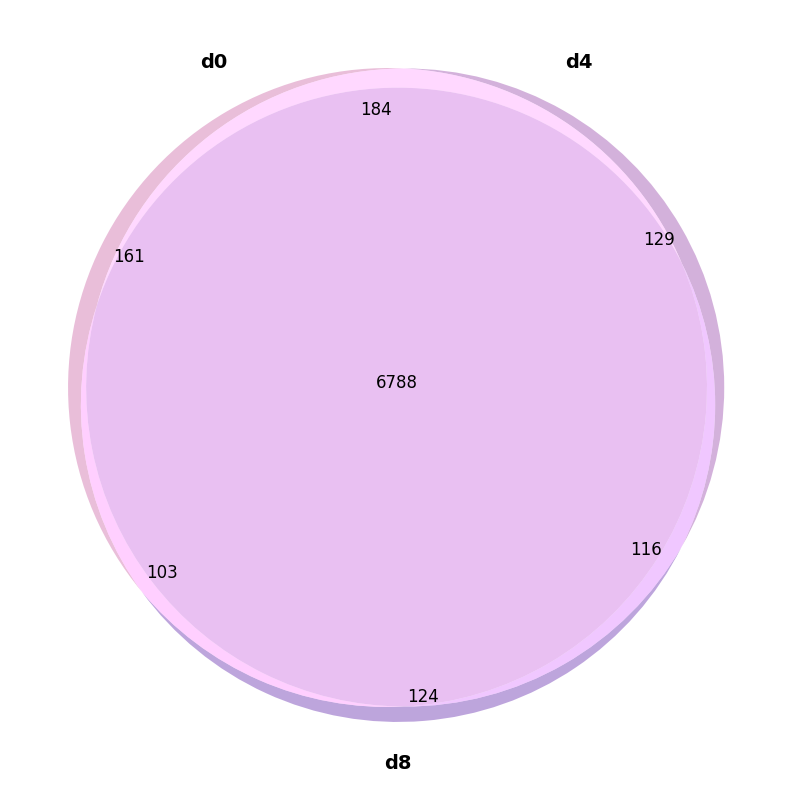

In [22]:
plt.figure(figsize=(10, 8))
v = venn3([set1, set2, set3], 
          set_labels=('d0', 'd4', 'd8'),
          set_colors=('#db93c0', '#b67ec3', '#9269c6'),
          alpha=0.6)


for text in v.set_labels:
    text.set_fontsize(14)
    text.set_fontweight('bold')

for text in v.subset_labels:
    if text:
        text.set_fontsize(12)

plt.tight_layout()

#plt.savefig(r'D:\Projects\SPEC\figs_raw\Figure_2m.pdf', dpi = 300, bbox_inches='tight')

# Figure 2F

In [24]:
df = pd.read_parquet(r'Z:\SPEC\submission\raw\figure2\LTH43.parquet')

In [25]:
df = df[df['PG.Q.Value']<0.01]

In [26]:
df['organism'] = df['Protein.Names'].apply(lambda x: x.split('_')[-1])

In [27]:
organism_list = df['organism'].unique().tolist()

In [28]:
groups = [['A01', 'A02', 'A03'], ['A04', 'A05', 'A06'],  ['B04', 'B05', 'B06'],  ['C04', 'C05', 'C06'],
           ['D04', 'D05', 'D06'], ['E04', 'E05', 'E06']]

In [29]:
df['reduced_id'] = df['Run'].apply(lambda x: x.split('_')[-1])

In [30]:
df_frac = df[df['reduced_id'].isin(groups[0]) == False]

In [31]:
df_ss = df[df['reduced_id'].isin(groups[0])]

In [32]:
nums_ss = []
for org in organism_list:
    tmp = []
    for el in df_ss['reduced_id'].unique().tolist():
        tmp_df = df_ss[(df_ss['organism'] == org) & (df_ss['reduced_id'] == el)]
        tmp.append(len(tmp_df.drop_duplicates('Protein.Group')))
    nums_ss.append(tmp)

In [33]:
nums_frac = []
reps = ['04', '05', '06']

for org in organism_list:
    tmp = []
    for el in reps:
        tmp_df = df_frac[(df_frac['organism'] == org) & (df_frac['reduced_id'].str.contains(el))]
        tmp.append(len(tmp_df.drop_duplicates('Protein.Group')))
    nums_frac.append(tmp)

In [34]:
nums_ss_prec = []
for org in organism_list:
    tmp = []
    for el in df_ss['reduced_id'].unique().tolist():
        tmp_df = df_ss[(df_ss['organism'] == org) & (df_ss['reduced_id'] == el)]
        tmp.append(len(tmp_df.drop_duplicates('Precursor.Id')))
    nums_ss_prec.append(tmp)

In [35]:
nums_frac_prec = []
reps = ['04', '05', '06']

for org in organism_list:
    tmp = []
    for el in reps:
        tmp_df = df_frac[(df_frac['organism'] == org) & (df_frac['reduced_id'].str.contains(el))]
        tmp.append(len(tmp_df.drop_duplicates('Precursor.Id')))
    nums_frac_prec.append(tmp)

In [36]:
sum_prec_ss = 0
for el in nums_ss_prec:
    sum_prec_ss += np.median(el)
####
sum_pg_ss = 0
for el in nums_ss:
    sum_pg_ss += np.median(el)

In [37]:
sum_prec_frac = 0
for el in nums_frac_prec:
    sum_prec_frac += np.median(el)
####
sum_pg_frac = 0
for el in nums_frac:
    sum_pg_frac += np.median(el)

In [38]:
import plotly.graph_objects as go
import numpy as np
single_shot_reps = [[7314, 7263, 7123], [4355, 4399, 4217], [4200, 4185, 4137]]
fractionation_reps = [[8812, 8921, 8871], [6953, 7182, 7162], [4707, 4727, 4724]]

species = ['Species 1', 'Species 2', 'Species 3']
colors = ['#00115e', '#004440', '#007621']


single_medians = [np.median(reps) for reps in single_shot_reps]
fract_medians = [np.median(reps) for reps in fractionation_reps]

strip_data = []
cum_single = np.cumsum([0] + single_medians[:-1])
cum_fract = np.cumsum([0] + fract_medians[:-1])

for i in range(len(species)):
    for rep_s, rep_f in zip(single_shot_reps[i], fractionation_reps[i]):
        strip_data.append({'Method': 'Single-shot', 'Value': cum_single[i] + rep_s})
        strip_data.append({'Method': 'Fractionation', 'Value': cum_fract[i] + rep_f})

strip_df = pd.DataFrame(strip_data)

fig = px.strip(strip_df, y='Value', x='Method')
fig.update_traces(jitter=0.5, marker=dict(size=14, color='black', 
                  line=dict(width=0.5, color='white')))

# Add stacked bars
for i, (sp, color) in enumerate(zip(species, colors)):
    fig.add_trace(go.Bar(
        y=[single_medians[i]], 
        x=['Single-shot'], 
        width=0.4, 
        marker_line_color='black', 
        marker_color=color,
        name=sp
    ))
    fig.add_trace(go.Bar(
        y=[fract_medians[i]], 
        x=['Fractionation'], 
        width=0.4, 
        marker_line_color='black', 
        marker_color=color,
        showlegend=False
    ))

fig.update_layout(
    width=500, 
    height=700, 
    template='plotly_white', 
    barmode='stack',
    xaxis_title='Method',
    yaxis_title='Phosphosites Identified',
    legend_title='Species'
)
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2c.pdf', width = 500, height = 700)

# Figure 2G

In [39]:
import plotly.graph_objects as go
import numpy as np
single_shot_reps = nums_ss_prec
fractionation_reps = nums_frac_prec

species = ['Species 1', 'Species 2', 'Species 3']
colors = ['#5a6776', '#916e75', '#e47874']


single_medians = [np.median(reps) for reps in single_shot_reps]
fract_medians = [np.median(reps) for reps in fractionation_reps]

strip_data = []
cum_single = np.cumsum([0] + single_medians[:-1])
cum_fract = np.cumsum([0] + fract_medians[:-1])

for i in range(len(species)):
    for rep_s, rep_f in zip(single_shot_reps[i], fractionation_reps[i]):
        strip_data.append({'Method': 'Single-shot', 'Value': cum_single[i] + rep_s})
        strip_data.append({'Method': 'Fractionation', 'Value': cum_fract[i] + rep_f})

strip_df = pd.DataFrame(strip_data)

fig = px.strip(strip_df, y='Value', x='Method')
fig.update_traces(jitter=0.5, marker=dict(size=14, color='black', 
                  line=dict(width=0.5, color='white')))

# Add stacked bars
for i, (sp, color) in enumerate(zip(species, colors)):
    fig.add_trace(go.Bar(
        y=[single_medians[i]], 
        x=['Single-shot'], 
        width=0.4, 
        marker_line_color='black', 
        marker_color=color,
        name=sp
    ))
    fig.add_trace(go.Bar(
        y=[fract_medians[i]], 
        x=['Fractionation'], 
        width=0.4, 
        marker_line_color='black', 
        marker_color=color,
        showlegend=False
    ))

fig.update_layout(
    width=500, 
    height=700, 
    template='plotly_white', 
    barmode='stack',
    xaxis_title='Method',
    yaxis_title='Phosphosites Identified',
    legend_title='Species'
)
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2d.pdf', width = 500, height = 700)

# Figure 2H

In [40]:
def compare_unique_identifiers_across_methods(experiment_dict: List[Dict],
                                             q_value_threshold: float = 0.01,
                                             output_dir: str = None,
                                             figure_size: tuple = (12, 8),
                                             vector_format: str = 'svg',
                                             save_raster: bool = True,
                                             export_identifier_lists: bool = False) -> Tuple[pd.DataFrame, plt.Figure]:
    """
    Compare unique precursors and proteins across different method groups with vector output.
    
    This function aggregates unique identifiers from conditions belonging to
    each method (e.g., all fractionation conditions vs non-fractionation). For each
    condition, only identifiers found in ALL replicates within that condition are kept,
    then these filtered sets are merged across conditions within each method group.
    
    For example, with fractionation: an identifier must be found in all 3 replicates
    within at least one fraction to be included in the fractionation method group.
    
    The function exports:
    - Summary tables (always exported when output_dir is set)
    - Filtered data files (.parquet and .csv) containing all rows that passed filtering (always)
    - Identifier lists (.txt) for shared/unique identifiers (when export_identifier_lists=True)
    
    Parameters:
    -----------
    experiment_dict : List[Dict]
        List of experiment dictionaries with 'method' field
    q_value_threshold : float, default=0.01
        Q-value threshold for filtering
    output_dir : str, optional
        Directory to save the output figure
    figure_size : tuple, optional
        Size of the figure (width, height) in inches
    vector_format : str, default='svg'
        Vector format for saving ('svg', 'pdf', 'eps')
    save_raster : bool, default=True
        Whether to also save high-resolution raster version
    export_identifier_lists : bool, default=False
        Whether to export detailed lists of identifiers for each method group
        
    Returns:
    --------
    tuple
        (summary_df, fig[, fig_venn]) - DataFrame with unique counts and the comparison figure(s)
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from collections import defaultdict
    import os
    
    # Set matplotlib to use vector-friendly settings
    plt.rcParams.update({
        'font.family': 'DejaVu Sans',
        'font.size': 12,
        'axes.titlesize': 18,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
        'figure.titlesize': 20,
        'axes.linewidth': 1.5,
        'grid.linewidth': 1.0,
        'lines.linewidth': 2.0,
        'patch.linewidth': 1.5,
        'savefig.facecolor': 'white',
        'savefig.edgecolor': 'none',
        'savefig.dpi': 300 if save_raster else 100
    })
    
    # Group experiments by method
    method_groups = defaultdict(list)
    for exp in experiment_dict:
        method = exp['method'] if exp['method'] else 'no_fractionation'
        method_groups[method].append(exp)
    
    print(f"Found {len(method_groups)} method groups: {list(method_groups.keys())}")
    print(f"Filtering strategy: identifiers must be found in ALL replicates within at least one condition")
    print(f"Vector format: {vector_format.upper()}")
    
    # Collect unique identifiers for each method group
    method_identifiers = {}
    
    for method, experiments in method_groups.items():
        print(f"\nProcessing method group: '{method}' with {len(experiments)} experiments")
        
        # Collect filtered identifiers from each condition separately
        method_precursors = set()
        method_proteins = set()
        method_peptides = set()
        
        # Store filtered dataframes for export
        method_filtered_dfs = []
        
        total_conditions = 0
        
        # Group by file to read each file only once
        file_experiments = defaultdict(list)
        for exp in experiments:
            file_experiments[exp['path']].append(exp)
        
        for file_path, file_exps in file_experiments.items():
            try:
                print(f"  Reading {file_path}...")
                df = pd.read_parquet(file_path)
                
                # Apply Q-value filter
                df = df[df['PG.Q.Value'] < q_value_threshold]
                
                if df.empty:
                    print(f"  Warning: No data after Q-value filtering")
                    continue
                
                # Process each condition separately
                for exp in file_exps:
                    total_conditions += 1
                    
                    # Create tag pattern for filtering
                    tag_pattern = '|'.join(exp['file_tags'])
                    mask = df['Run'].str.contains(tag_pattern, na=False, regex=True)
                    exp_df = df[mask]
                    
                    if exp_df.empty:
                        continue
                    
                    # Get unique runs for this condition
                    runs_in_condition = exp_df['Run'].unique()
                    n_replicates = len(runs_in_condition)
                    
                    # Track which runs each identifier appears in within this condition
                    condition_precursor_runs = defaultdict(set)
                    condition_protein_runs = defaultdict(set)
                    condition_peptide_runs = defaultdict(set)
                    
                    for run in runs_in_condition:
                        run_df = exp_df[exp_df['Run'] == run]
                        
                        for precursor in run_df['Precursor.Id'].unique():
                            condition_precursor_runs[precursor].add(run)
                        
                        for protein in run_df['Protein.Group'].unique():
                            condition_protein_runs[protein].add(run)
                        
                        for peptide in run_df['Stripped.Sequence'].unique():
                            condition_peptide_runs[peptide].add(run)
                    
                    # Filter for identifiers found in all replicates in this condition
                    condition_filtered_precursors = {p for p, runs in condition_precursor_runs.items() 
                                                    if len(runs) == n_replicates}
                    condition_filtered_proteins = {p for p, runs in condition_protein_runs.items() 
                                                  if len(runs) == n_replicates}
                    condition_filtered_peptides = {p for p, runs in condition_peptide_runs.items() 
                                                  if len(runs) == n_replicates}
                    
                    # Filter the dataframe to only include identifiers found in all replicates
                    condition_filtered_df = exp_df[exp_df['Precursor.Id'].isin(condition_filtered_precursors)]
                    method_filtered_dfs.append(condition_filtered_df)
                    
                    condition_name = f"{exp['instrument']}_{exp.get('condition', 'condition')}"
                    print(f"    {condition_name}: {n_replicates} replicates")
                    print(f"      Before filtering: {len(condition_precursor_runs)} precursors, "
                          f"{len(condition_protein_runs)} proteins, "
                          f"{len(condition_peptide_runs)} peptides")
                    print(f"      After filtering (found in all {n_replicates} replicates): "
                          f"{len(condition_filtered_precursors)} precursors, "
                          f"{len(condition_filtered_proteins)} proteins, "
                          f"{len(condition_filtered_peptides)} peptides")
                    print(f"      Filtered dataframe rows: {len(condition_filtered_df)}")
                    
                    # Add to method group's aggregated identifiers
                    method_precursors.update(condition_filtered_precursors)
                    method_proteins.update(condition_filtered_proteins)
                    method_peptides.update(condition_filtered_peptides)
                
            except Exception as e:
                print(f"  Error reading {file_path}: {e}")
                continue
        
        print(f"\n  Total conditions in method group '{method}': {total_conditions}")
        print(f"  Final aggregated counts for '{method}': "
              f"{len(method_precursors)} precursors, "
              f"{len(method_proteins)} proteins, "
              f"{len(method_peptides)} peptides")
        
        # Concatenate all filtered dataframes for this method
        if method_filtered_dfs:
            combined_df = pd.concat(method_filtered_dfs, ignore_index=True)
            print(f"  Combined filtered dataframe: {len(combined_df)} total rows")
        else:
            combined_df = pd.DataFrame()
        
        method_identifiers[method] = {
            'precursors': method_precursors,
            'proteins': method_proteins,
            'peptides': method_peptides,
            'filtered_df': combined_df
        }
    
    # Create summary dataframe
    summary_data = []
    for method, identifiers in method_identifiers.items():
        summary_data.append({
            'Method': method,
            'Unique_Precursors': len(identifiers['precursors']),
            'Unique_Proteins': len(identifiers['proteins']),
            'Unique_Peptides': len(identifiers['peptides'])
        })
    
    summary_df = pd.DataFrame(summary_data)
    
    # Calculate overlaps if we have exactly 2 method groups
    if len(method_groups) == 2:
        methods = list(method_identifiers.keys())
        m1, m2 = methods[0], methods[1]
        
        # Calculate overlaps
        precursor_overlap = len(method_identifiers[m1]['precursors'] & 
                               method_identifiers[m2]['precursors'])
        protein_overlap = len(method_identifiers[m1]['proteins'] & 
                             method_identifiers[m2]['proteins'])
        peptide_overlap = len(method_identifiers[m1]['peptides'] & 
                             method_identifiers[m2]['peptides'])
        
        # Calculate unique to each method
        precursor_only_m1 = len(method_identifiers[m1]['precursors'] - 
                                method_identifiers[m2]['precursors'])
        precursor_only_m2 = len(method_identifiers[m2]['precursors'] - 
                                method_identifiers[m1]['precursors'])
        
        protein_only_m1 = len(method_identifiers[m1]['proteins'] - 
                              method_identifiers[m2]['proteins'])
        protein_only_m2 = len(method_identifiers[m2]['proteins'] - 
                              method_identifiers[m1]['proteins'])
        
        print(f"\n=== Overlap Analysis ===")
        print(f"Precursors: {precursor_overlap} shared, "
              f"{precursor_only_m1} unique to {m1}, "
              f"{precursor_only_m2} unique to {m2}")
        print(f"Proteins: {protein_overlap} shared, "
              f"{protein_only_m1} unique to {m1}, "
              f"{protein_only_m2} unique to {m2}")
        
        # Create overlap summary DataFrame
        overlap_df = pd.DataFrame([
            {
                'Identifier_Type': 'Precursors',
                'Shared': precursor_overlap,
                f'Unique_to_{m1}': precursor_only_m1,
                f'Unique_to_{m2}': precursor_only_m2,
                f'Total_{m1}': len(method_identifiers[m1]['precursors']),
                f'Total_{m2}': len(method_identifiers[m2]['precursors'])
            },
            {
                'Identifier_Type': 'Proteins',
                'Shared': protein_overlap,
                f'Unique_to_{m1}': protein_only_m1,
                f'Unique_to_{m2}': protein_only_m2,
                f'Total_{m1}': len(method_identifiers[m1]['proteins']),
                f'Total_{m2}': len(method_identifiers[m2]['proteins'])
            },
            {
                'Identifier_Type': 'Peptides',
                'Shared': len(method_identifiers[m1]['peptides'] & method_identifiers[m2]['peptides']),
                f'Unique_to_{m1}': len(method_identifiers[m1]['peptides'] - method_identifiers[m2]['peptides']),
                f'Unique_to_{m2}': len(method_identifiers[m2]['peptides'] - method_identifiers[m1]['peptides']),
                f'Total_{m1}': len(method_identifiers[m1]['peptides']),
                f'Total_{m2}': len(method_identifiers[m2]['peptides'])
            }
        ])
    
    # Create comparison plot with enhanced styling
    fig, axes = plt.subplots(1, 3, figsize=figure_size)
    fig.patch.set_facecolor('white')
    
    # Define professional color palette
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E', '#8E44AD', '#E67E22']
    method_colors = {method: colors[i % len(colors)] 
                    for i, method in enumerate(summary_df['Method'])}
    
    # Plot 1: Precursors
    ax1 = axes[0]
    bars1 = ax1.bar(summary_df['Method'], summary_df['Unique_Precursors'],
                    color=[method_colors[m] for m in summary_df['Method']],
                    edgecolor='white', linewidth=2, alpha=0.9)
    ax1.set_ylabel('Unique Count', fontsize=16, fontweight='bold')
    ax1.set_title('Unique Precursors', fontsize=18, fontweight='bold', pad=20)
    ax1.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
    ax1.set_axisbelow(True)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis='both', labelsize=14, width=1.5)
    
    # Add value labels on bars
    for bar, value in zip(bars1, summary_df['Unique_Precursors']):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + max(summary_df['Unique_Precursors'])*0.02,
                f'{value:,}', ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # Plot 2: Proteins
    ax2 = axes[1]
    bars2 = ax2.bar(summary_df['Method'], summary_df['Unique_Proteins'],
                    color=[method_colors[m] for m in summary_df['Method']],
                    edgecolor='white', linewidth=2, alpha=0.9)
    ax2.set_ylabel('Unique Count', fontsize=16, fontweight='bold')
    ax2.set_title('Unique Proteins', fontsize=18, fontweight='bold', pad=20)
    ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
    ax2.set_axisbelow(True)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='both', labelsize=14, width=1.5)
    
    for bar, value in zip(bars2, summary_df['Unique_Proteins']):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + max(summary_df['Unique_Proteins'])*0.02,
                f'{value:,}', ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # Plot 3: Peptides
    ax3 = axes[2]
    bars3 = ax3.bar(summary_df['Method'], summary_df['Unique_Peptides'],
                    color=[method_colors[m] for m in summary_df['Method']],
                    edgecolor='white', linewidth=2, alpha=0.9)
    ax3.set_ylabel('Unique Count', fontsize=16, fontweight='bold')
    ax3.set_title('Unique Peptides', fontsize=18, fontweight='bold', pad=20)
    ax3.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
    ax3.set_axisbelow(True)
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    ax3.tick_params(axis='both', labelsize=14, width=1.5)
    
    for bar, value in zip(bars3, summary_df['Unique_Peptides']):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + max(summary_df['Unique_Peptides'])*0.02,
                f'{value:,}', ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    # Rotate x-axis labels if needed
    for ax in axes:
        ax.set_xlabel('Method Group', fontsize=16, fontweight='bold')
        if len(summary_df) > 2 or any(len(method) > 10 for method in summary_df['Method']):
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
    
    plt.suptitle(f'Comparison of Unique Identifiers Across Method Groups\n(Found in all replicates within at least one condition)', 
                 fontsize=20, fontweight='bold', y=1.08)
    plt.tight_layout()
    
    # Save figure(s) and summary table if output directory is provided
    saved_files = []
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        
        # Save summary table
        table_path = os.path.join(output_dir, 'unique_identifiers_summary.csv')
        summary_df.to_csv(table_path, index=False)
        saved_files.append(table_path)
        print(f"\nSaved summary table: {table_path}")
        
        # Save overlap analysis if we have 2 method groups
        if len(method_groups) == 2:
            overlap_table_path = os.path.join(output_dir, 'overlap_analysis.csv')
            overlap_df.to_csv(overlap_table_path, index=False)
            saved_files.append(overlap_table_path)
            print(f"Saved overlap analysis: {overlap_table_path}")
            
            # Export overlap/unique identifier lists if requested
            if export_identifier_lists:
                methods = list(method_identifiers.keys())
                m1, m2 = methods[0], methods[1]
                m1_safe = m1.replace('/', '_').replace(' ', '_')
                m2_safe = m2.replace('/', '_').replace(' ', '_')
                
                print("\nExporting overlap/unique identifier lists...")
                
                # Shared identifiers
                shared_precursors = method_identifiers[m1]['precursors'] & method_identifiers[m2]['precursors']
                shared_path = os.path.join(output_dir, 'shared_precursors.txt')
                with open(shared_path, 'w') as f:
                    f.write('\n'.join(sorted(shared_precursors)))
                saved_files.append(shared_path)
                print(f"  Saved shared precursors: {shared_path}")
                
                shared_proteins = method_identifiers[m1]['proteins'] & method_identifiers[m2]['proteins']
                shared_path = os.path.join(output_dir, 'shared_proteins.txt')
                with open(shared_path, 'w') as f:
                    f.write('\n'.join(sorted(shared_proteins)))
                saved_files.append(shared_path)
                print(f"  Saved shared proteins: {shared_path}")
                
                # Unique to m1
                unique_m1_precursors = method_identifiers[m1]['precursors'] - method_identifiers[m2]['precursors']
                unique_path = os.path.join(output_dir, f'unique_to_{m1_safe}_precursors.txt')
                with open(unique_path, 'w') as f:
                    f.write('\n'.join(sorted(unique_m1_precursors)))
                saved_files.append(unique_path)
                print(f"  Saved unique to {m1} precursors: {unique_path}")
                
                unique_m1_proteins = method_identifiers[m1]['proteins'] - method_identifiers[m2]['proteins']
                unique_path = os.path.join(output_dir, f'unique_to_{m1_safe}_proteins.txt')
                with open(unique_path, 'w') as f:
                    f.write('\n'.join(sorted(unique_m1_proteins)))
                saved_files.append(unique_path)
                print(f"  Saved unique to {m1} proteins: {unique_path}")
                
                # Unique to m2
                unique_m2_precursors = method_identifiers[m2]['precursors'] - method_identifiers[m1]['precursors']
                unique_path = os.path.join(output_dir, f'unique_to_{m2_safe}_precursors.txt')
                with open(unique_path, 'w') as f:
                    f.write('\n'.join(sorted(unique_m2_precursors)))
                saved_files.append(unique_path)
                print(f"  Saved unique to {m2} precursors: {unique_path}")
                
                unique_m2_proteins = method_identifiers[m2]['proteins'] - method_identifiers[m1]['proteins']
                unique_path = os.path.join(output_dir, f'unique_to_{m2_safe}_proteins.txt')
                with open(unique_path, 'w') as f:
                    f.write('\n'.join(sorted(unique_m2_proteins)))
                saved_files.append(unique_path)
                print(f"  Saved unique to {m2} proteins: {unique_path}")
        
        # Save detailed identifier lists for all methods if requested
        if export_identifier_lists:
            print("\nExporting complete identifier lists per method...")
            for method, identifiers in method_identifiers.items():
                method_safe = method.replace('/', '_').replace(' ', '_')
                
                # Export precursors
                precursor_path = os.path.join(output_dir, f'{method_safe}_all_precursors.txt')
                with open(precursor_path, 'w') as f:
                    f.write('\n'.join(sorted(identifiers['precursors'])))
                saved_files.append(precursor_path)
                print(f"  Saved {method} all precursors: {precursor_path}")
                
                # Export proteins
                protein_path = os.path.join(output_dir, f'{method_safe}_all_proteins.txt')
                with open(protein_path, 'w') as f:
                    f.write('\n'.join(sorted(identifiers['proteins'])))
                saved_files.append(protein_path)
                print(f"  Saved {method} all proteins: {protein_path}")
                
                # Export peptides
                peptide_path = os.path.join(output_dir, f'{method_safe}_all_peptides.txt')
                with open(peptide_path, 'w') as f:
                    f.write('\n'.join(sorted(identifiers['peptides'])))
                saved_files.append(peptide_path)
                print(f"  Saved {method} all peptides: {peptide_path}")
        
        # Export filtered dataframes (full data with all columns)
        print("\nExporting filtered dataframes...")
        for method, identifiers in method_identifiers.items():
            if not identifiers['filtered_df'].empty:
                method_safe = method.replace('/', '_').replace(' ', '_')
                
                # Export as parquet (preserves data types and is compressed)
                parquet_path = os.path.join(output_dir, f'{method_safe}_filtered_data.parquet')
                identifiers['filtered_df'].to_parquet(parquet_path, index=False)
                saved_files.append(parquet_path)
                print(f"  Saved {method} filtered data: {parquet_path} ({len(identifiers['filtered_df'])} rows)")
                
                # Also export as CSV for easier viewing
                csv_path = os.path.join(output_dir, f'{method_safe}_filtered_data.csv')
                identifiers['filtered_df'].to_csv(csv_path, index=False)
                saved_files.append(csv_path)
                print(f"  Saved {method} filtered data (CSV): {csv_path}")
        
        # Save vector format
        vector_path = os.path.join(output_dir, f'unique_identifiers_comparison.{vector_format}')
        fig.savefig(vector_path, format=vector_format, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        saved_files.append(vector_path)
        print(f"\nSaved vector plot: {vector_path}")
        
        # Save high-resolution raster if requested
        if save_raster:
            raster_path = os.path.join(output_dir, 'unique_identifiers_comparison.png')
            fig.savefig(raster_path, dpi=300, bbox_inches='tight', 
                       facecolor='white', edgecolor='none')
            saved_files.append(raster_path)
            print(f"Saved raster plot: {raster_path}")
    
    # If we have exactly 2 groups, create a Venn diagram
    if len(method_groups) == 2:
        fig_venn, venn_files = create_venn_diagram(method_identifiers, output_dir, 
                                                   vector_format, save_raster)
        saved_files.extend(venn_files)
        return summary_df, fig, fig_venn, saved_files, method_identifiers
    
    return summary_df, fig, saved_files, method_identifiers


def create_venn_diagram(method_identifiers: Dict, output_dir: str = None, 
                       vector_format: str = 'svg', save_raster: bool = True) -> Tuple[plt.Figure, List[str]]:
    """
    Create Venn diagrams showing the overlap between two method groups with vector output.
    
    Parameters:
    -----------
    method_identifiers : Dict
        Dictionary with method names as keys and identifier sets as values
    output_dir : str, optional
        Directory to save the output figure
    vector_format : str, default='svg'
        Vector format for saving ('svg', 'pdf', 'eps')
    save_raster : bool, default=True
        Whether to also save high-resolution raster version
        
    Returns:
    --------
    tuple
        (fig, saved_files) - The created Venn diagram figure and list of saved file paths
    """
    try:
        from matplotlib_venn import venn2
    except ImportError:
        print("Warning: matplotlib_venn not installed. Install with: pip install matplotlib-venn")
        return None, []
    
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.patch.set_facecolor('white')
    
    methods = list(method_identifiers.keys())
    m1, m2 = methods[0], methods[1]
    
    # Professional colors for Venn diagrams
    colors = ('#2E86AB', '#A23B72')
    
    # Precursors Venn
    ax1 = axes[0]
    try:
        venn1 = venn2([method_identifiers[m1]['precursors'], 
                       method_identifiers[m2]['precursors']], 
                      set_labels=(m1, m2), ax=ax1,
                      set_colors=colors, alpha=0.7)
        ax1.set_title('Precursors Overlap', fontsize=20, fontweight='bold', pad=20)
        
        # Style Venn diagram text
        if venn1.set_labels:
            for text in venn1.set_labels:
                if text:
                    text.set_fontsize(16)
                    text.set_fontweight('bold')
        if venn1.subset_labels:
            for text in venn1.subset_labels:
                if text:
                    text.set_fontsize(14)
                    text.set_fontweight('bold')
    except Exception as e:
        print(f"Error creating precursors Venn diagram: {e}")
        ax1.text(0.5, 0.5, 'Error creating\nVenn diagram', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=14)
        ax1.set_title('Precursors Overlap', fontsize=20, fontweight='bold', pad=20)
    
    # Proteins Venn
    ax2 = axes[1]
    try:
        venn2_plot = venn2([method_identifiers[m1]['proteins'], 
                            method_identifiers[m2]['proteins']], 
                           set_labels=(m1, m2), ax=ax2,
                           set_colors=colors, alpha=0.7)
        ax2.set_title('Proteins Overlap', fontsize=20, fontweight='bold', pad=20)
        
        if venn2_plot.set_labels:
            for text in venn2_plot.set_labels:
                if text:
                    text.set_fontsize(16)
                    text.set_fontweight('bold')
        if venn2_plot.subset_labels:
            for text in venn2_plot.subset_labels:
                if text:
                    text.set_fontsize(14)
                    text.set_fontweight('bold')
    except Exception as e:
        print(f"Error creating proteins Venn diagram: {e}")
        ax2.text(0.5, 0.5, 'Error creating\nVenn diagram', 
                ha='center', va='center', transform=ax2.transAxes, fontsize=14)
        ax2.set_title('Proteins Overlap', fontsize=20, fontweight='bold', pad=20)
    
    # Peptides Venn
    ax3 = axes[2]
    try:
        venn3 = venn2([method_identifiers[m1]['peptides'], 
                       method_identifiers[m2]['peptides']], 
                      set_labels=(m1, m2), ax=ax3,
                      set_colors=colors, alpha=0.7)
        ax3.set_title('Peptides Overlap', fontsize=20, fontweight='bold', pad=20)
        
        if venn3.set_labels:
            for text in venn3.set_labels:
                if text:
                    text.set_fontsize(16)
                    text.set_fontweight('bold')
        if venn3.subset_labels:
            for text in venn3.subset_labels:
                if text:
                    text.set_fontsize(14)
                    text.set_fontweight('bold')
    except Exception as e:
        print(f"Error creating peptides Venn diagram: {e}")
        ax3.text(0.5, 0.5, 'Error creating\nVenn diagram', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=14)
        ax3.set_title('Peptides Overlap', fontsize=20, fontweight='bold', pad=20)
    
    plt.suptitle(f'Overlap Analysis Between Method Groups\n(Identifiers found in all replicates within at least one condition)', 
                 fontsize=22, fontweight='bold', y=0.98)
    plt.tight_layout()
    
    # Save figure(s) if output directory is provided
    saved_files = []
    if output_dir:
        import os
        os.makedirs(output_dir, exist_ok=True)
        
        # Save vector format
        vector_path = os.path.join(output_dir, f'venn_diagram_comparison.{vector_format}')
        fig.savefig(vector_path, format=vector_format, bbox_inches='tight',
                   facecolor='white', edgecolor='none')
        saved_files.append(vector_path)
        print(f"Saved Venn vector plot: {vector_path}")
        
        # Save high-resolution raster if requested
        if save_raster:
            raster_path = os.path.join(output_dir, 'venn_diagram_comparison.png')
            fig.savefig(raster_path, dpi=300, bbox_inches='tight',
                       facecolor='white', edgecolor='none')
            saved_files.append(raster_path)
            print(f"Saved Venn raster plot: {raster_path}")
    
    return fig, saved_files
def analyze_species_coverage(method_identifiers,
                           fasta_human,
                           fasta_yeast,
                           fasta_arath,
                           output_dir=None,
                           figure_size=(16, 10),
                           vector_format='svg',
                           save_raster=True):
    """
    Analyze peptide coverage per protein for each species in fractionated and non-fractionated methods.
    
    Creates histograms showing:
    1. Number of peptides per protein
    2. Sequence coverage per protein
    
    Parameters:
    -----------
    method_identifiers : Dict
        Dictionary with method names as keys, containing 'filtered_df' DataFrames
    fasta_human : str
        Path to human FASTA file
    fasta_yeast : str
        Path to yeast FASTA file
    fasta_arath : str
        Path to A. thaliana FASTA file
    output_dir : str, optional
        Directory to save output files
    figure_size : tuple, default=(16, 10)
        Figure size (width, height) in inches
    vector_format : str, default='svg'
        Vector format for saving ('svg', 'pdf', 'eps')
    save_raster : bool, default=True
        Whether to save high-resolution raster version
        
    Returns:
    --------
    tuple
        (summary_df, fig) - Summary statistics DataFrame and matplotlib figure
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from collections import defaultdict
    import os
    
    # Set matplotlib parameters
    plt.rcParams.update({
        'font.family': 'DejaVu Sans',
        'font.size': 11,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'figure.titlesize': 16
    })
    
    def parse_fasta(fasta_path):
        """Parse FASTA file and return dict of {gene_name: (full_key, sequence)}"""
        sequences = {}
        current_id = None
        current_seq = []
        
        with open(fasta_path, 'r') as f:
            for line in f:
                line = line.strip()
                if line.startswith('>'):
                    if current_id:
                        # Store with gene name as key
                        gene_name = current_id.split('|')[-1].split()[0] if '|' in current_id else current_id.split()[0]
                        sequences[gene_name] = (current_id, ''.join(current_seq))
                    # Keep full header
                    current_id = line[1:]
                    current_seq = []
                else:
                    current_seq.append(line)
            
            if current_id:
                gene_name = current_id.split('|')[-1].split()[0] if '|' in current_id else current_id.split()[0]
                sequences[gene_name] = (current_id, ''.join(current_seq))
        
        return sequences
    
    def calculate_coverage(peptide_sequence, protein_sequence):
        """Calculate which positions in protein are covered by peptide"""
        covered_positions = set()
        peptide_clean = peptide_sequence.upper()
        peptide_clean = ''.join([c for c in peptide_clean if c.isalpha()])
        
        # Find all occurrences of peptide in protein
        start = 0
        while True:
            pos = protein_sequence.find(peptide_clean, start)
            if pos == -1:
                break
            covered_positions.update(range(pos, pos + len(peptide_clean)))
            start = pos + 1
        
        return covered_positions
    
    def extract_gene_names(protein_names_str):
        """Extract gene names from Protein.Names column"""
        # Format: sp|P12345|GENENAME_HUMAN;sp|Q54321|GENENAME2_HUMAN
        gene_names = []
        if pd.isna(protein_names_str):
            return gene_names
        
        # Split by semicolon for protein groups
        parts = str(protein_names_str).split(';')
        for part in parts:
            # Extract gene name (part after second |)
            if '|' in part:
                gene_name = part.split('|')[-1].split()[0]
                gene_names.append(gene_name)
            else:
                gene_names.append(part.split()[0])
        
        return gene_names
    
    print("Loading FASTA files...")
    fasta_files = {
        'HUMAN': parse_fasta(fasta_human),
        'YEAST': parse_fasta(fasta_yeast),
        'ARATH': parse_fasta(fasta_arath)
    }
    print(f"  HUMAN: {len(fasta_files['HUMAN'])} proteins")
    print(f"  YEAST: {len(fasta_files['YEAST'])} proteins")
    print(f"  ARATH: {len(fasta_files['ARATH'])} proteins")
    
    # Analyze each method
    results = {}
    
    for method, identifiers in method_identifiers.items():
        print(f"\n=== Analyzing {method} ===")
        
        if identifiers['filtered_df'].empty:
            print(f"  No data for {method}, skipping...")
            continue
        
        df = identifiers['filtered_df']
        
        # Get unique peptide-protein pairs
        peptide_protein_pairs = df[['Stripped.Sequence', 'Protein.Names', 'Protein.Group']].drop_duplicates()
        
        # Separate by species
        species_data = {
            'HUMAN': peptide_protein_pairs[peptide_protein_pairs['Protein.Names'].str.contains('_HUMAN', na=False)],
            'YEAST': peptide_protein_pairs[peptide_protein_pairs['Protein.Names'].str.contains('_YEAST', na=False)],
            'ARATH': peptide_protein_pairs[peptide_protein_pairs['Protein.Names'].str.contains('_ARATH', na=False)]
        }
        
        method_results = {}
        
        for species, species_df in species_data.items():
            print(f"\n  {species}:")
            print(f"    Total peptide-protein pairs: {len(species_df)}")
            
            if species_df.empty:
                print(f"    No data for {species}, skipping...")
                continue
            
            # Map protein names to gene names and peptides
            protein_peptides = defaultdict(set)
            protein_to_gene_name = {}
            
            for _, row in species_df.iterrows():
                protein_group = row['Protein.Group']
                peptide = row['Stripped.Sequence']
                protein_names = row['Protein.Names']
                
                # Extract gene names from protein names
                gene_names = extract_gene_names(protein_names)
                
                if gene_names:
                    # Use first gene name as representative
                    gene_name = gene_names[0]
                    protein_to_gene_name[protein_group] = gene_name
                    protein_peptides[protein_group].add(peptide)
                else:
                    # Use protein group if no gene name found
                    protein_peptides[protein_group].add(peptide)
            
            # Show some examples of the matching
            if len(protein_to_gene_name) > 0:
                examples = list(protein_to_gene_name.items())[:3]
                print(f"    Example gene name mappings:")
                for prot, gene in examples:
                    in_fasta = "✓" if gene in fasta_files[species] else "✗"
                    print(f"      {prot} → {gene} [{in_fasta}]")
            
            print(f"    Unique proteins: {len(protein_peptides)}")
            print(f"    Unique peptides: {len(set(species_df['Stripped.Sequence']))}")
            
            # Calculate coverage for each protein
            peptides_per_protein = []
            coverage_per_protein = []
            proteins_found = 0
            proteins_not_found = 0
            
            for protein_id, peptides in protein_peptides.items():
                peptides_per_protein.append(len(peptides))
                
                # Get gene name for this protein
                gene_name = protein_to_gene_name.get(protein_id)
                
                if gene_name and gene_name in fasta_files[species]:
                    proteins_found += 1
                    # Get protein sequence from FASTA
                    full_key, protein_seq = fasta_files[species][gene_name]
                    
                    # Calculate coverage
                    covered_positions = set()
                    for peptide in peptides:
                        covered_positions.update(calculate_coverage(peptide, protein_seq))
                    
                    coverage_pct = (len(covered_positions) / len(protein_seq)) * 100
                    coverage_per_protein.append(coverage_pct)
                else:
                    # Protein not found in FASTA
                    proteins_not_found += 1
                    coverage_per_protein.append(np.nan)
            
            # Remove NaN values for coverage
            valid_coverage = [c for c in coverage_per_protein if not np.isnan(c)]
            
            print(f"    Proteins found in FASTA: {proteins_found}/{len(protein_peptides)} ({proteins_not_found} not found)")
            print(f"    Peptides per protein: mean={np.mean(peptides_per_protein):.1f}, "
                  f"median={np.median(peptides_per_protein):.1f}, "
                  f"max={np.max(peptides_per_protein)}")
            
            if valid_coverage:
                print(f"    Coverage per protein: mean={np.mean(valid_coverage):.1f}%, "
                      f"median={np.median(valid_coverage):.1f}%")
            else:
                print(f"    Warning: No proteins found in FASTA for coverage calculation")
            
            method_results[species] = {
                'peptides_per_protein': peptides_per_protein,
                'coverage_per_protein': valid_coverage,
                'n_proteins': len(protein_peptides),
                'n_peptides': len(set(species_df['Stripped.Sequence'])),
                'n_proteins_with_seq': len(valid_coverage)
            }
        
        results[method] = method_results
    
    # Create plots
    methods = list(results.keys())
    species_list = ['HUMAN', 'YEAST', 'ARATH']
    colors = {'HUMAN': '#2E86AB', 'YEAST': '#A23B72', 'ARATH': '#F18F01'}
    
    # Create figure with 2 rows (peptides per protein, coverage) x 3 columns (species)
    fig, axes = plt.subplots(2, 3, figsize=figure_size)
    fig.patch.set_facecolor('white')
    
    # Row 1: Peptides per protein
    for col, species in enumerate(species_list):
        ax = axes[0, col]
        
        for method in methods:
            if species in results[method]:
                data = results[method][species]['peptides_per_protein']
                ax.hist(data, bins=30, alpha=0.6, label=method, 
                       edgecolor='black', linewidth=0.5)
        
        ax.set_xlabel('Peptides per Protein', fontweight='bold')
        ax.set_ylabel('Number of Proteins', fontweight='bold')
        ax.set_title(f'{species} - Peptides per Protein', fontweight='bold', fontsize=12)
        ax.legend(loc='upper right')
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    # Row 2: Sequence coverage
    for col, species in enumerate(species_list):
        ax = axes[1, col]
        
        for method in methods:
            if species in results[method]:
                data = results[method][species]['coverage_per_protein']
                if data:  # Only plot if we have coverage data
                    ax.hist(data, bins=30, alpha=0.6, label=method,
                           edgecolor='black', linewidth=0.5)
        
        ax.set_xlabel('Sequence Coverage (%)', fontweight='bold')
        ax.set_ylabel('Number of Proteins', fontweight='bold')
        ax.set_title(f'{species} - Sequence Coverage', fontweight='bold', fontsize=12)
        ax.legend(loc='upper right')
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(0, 100)
    
    plt.suptitle('Peptide Coverage Analysis by Species and Method', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    
    # Create summary dataframe
    summary_data = []
    for method in methods:
        for species in species_list:
            if species in results[method]:
                res = results[method][species]
                summary_data.append({
                    'Method': method,
                    'Species': species,
                    'N_Proteins': res['n_proteins'],
                    'N_Peptides': res['n_peptides'],
                    'N_Proteins_With_Sequence': res['n_proteins_with_seq'],
                    'Mean_Peptides_Per_Protein': np.mean(res['peptides_per_protein']),
                    'Median_Peptides_Per_Protein': np.median(res['peptides_per_protein']),
                    'Mean_Coverage_Pct': np.mean(res['coverage_per_protein']) if res['coverage_per_protein'] else np.nan,
                    'Median_Coverage_Pct': np.median(res['coverage_per_protein']) if res['coverage_per_protein'] else np.nan
                })
    
    summary_df = pd.DataFrame(summary_data)
    
    # Save outputs
    saved_files = []
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        
        # Save summary table
        summary_path = os.path.join(output_dir, 'species_coverage_summary.csv')
        summary_df.to_csv(summary_path, index=False)
        saved_files.append(summary_path)
        print(f"\nSaved summary table: {summary_path}")
        
        # Save detailed data for each method/species
        for method in methods:
            for species in species_list:
                if species in results[method]:
                    method_safe = method.replace('/', '_').replace(' ', '_')
                    
                    # Peptides per protein
                    ppp_df = pd.DataFrame({
                        'Peptides_Per_Protein': results[method][species]['peptides_per_protein']
                    })
                    ppp_path = os.path.join(output_dir, 
                                           f'{method_safe}_{species}_peptides_per_protein.csv')
                    ppp_df.to_csv(ppp_path, index=False)
                    saved_files.append(ppp_path)
                    
                    # Coverage per protein
                    if results[method][species]['coverage_per_protein']:
                        cov_df = pd.DataFrame({
                            'Coverage_Percent': results[method][species]['coverage_per_protein']
                        })
                        cov_path = os.path.join(output_dir,
                                               f'{method_safe}_{species}_coverage_per_protein.csv')
                        cov_df.to_csv(cov_path, index=False)
                        saved_files.append(cov_path)
        
        # Save vector plot
        vector_path = os.path.join(output_dir, f'species_coverage_analysis.{vector_format}')
        fig.savefig(vector_path, format=vector_format, bbox_inches='tight',
                   facecolor='white', edgecolor='none')
        saved_files.append(vector_path)
        print(f"Saved vector plot: {vector_path}")
        
        # Save raster if requested
        if save_raster:
            raster_path = os.path.join(output_dir, 'species_coverage_analysis.png')
            fig.savefig(raster_path, dpi=300, bbox_inches='tight',
                       facecolor='white', edgecolor='none')
            saved_files.append(raster_path)
            print(f"Saved raster plot: {raster_path}")
        
        print(f"\nTotal files saved: {len(saved_files)}")
    
    return summary_df, fig, saved_files


In [41]:
path = r'Z:\SPEC\submission\raw\figure2\LTH43.parquet'

experiment_dict = [
        {'instrument': '1per FA', 'method': '', 'file_tags': ['A01','A02','A03'], 
         'path': path},
        {'instrument': '0 mM NaCl', 'method': 'fractionation', 'file_tags': ['A04','A05','A06'], 
         'path': path},
        {'instrument': '50 mM NaCl', 'method': 'fractionation', 'file_tags': ['B04','B05','B06'], 
         'path': path},
        {'instrument': '100 mM NaCl', 'method': 'fractionation', 'file_tags': ['C04','C05','C06'], 
         'path': path},
        {'instrument': '300 mM NaCl', 'method': 'fractionation', 'file_tags': ['D04','D05','D06'], 
         'path': path},
        {'instrument': '1per FA', 'method': 'fractionation', 'file_tags': ['E04','E05','E06'], 
         'path': path}
    ]

In [42]:
output_dir = r"Z:\SPEC\submission\raw\figure2"

Found 2 method groups: ['no_fractionation', 'fractionation']
Filtering strategy: identifiers must be found in ALL replicates within at least one condition
Vector format: SVG

Processing method group: 'no_fractionation' with 1 experiments
  Reading Z:\SPEC\submission\raw\figure2\LTH43.parquet...
    1per FA_condition: 3 replicates
      Before filtering: 288498 precursors, 17411 proteins, 219390 peptides
      After filtering (found in all 3 replicates): 191788 precursors, 15072 proteins, 152787 peptides
      Filtered dataframe rows: 575364

  Total conditions in method group 'no_fractionation': 1
  Final aggregated counts for 'no_fractionation': 191788 precursors, 15072 proteins, 152787 peptides
  Combined filtered dataframe: 575364 total rows

Processing method group: 'fractionation' with 5 experiments
  Reading Z:\SPEC\submission\raw\figure2\LTH43.parquet...
    0 mM NaCl_condition: 3 replicates
      Before filtering: 195125 precursors, 18294 proteins, 151566 peptides
      After f

C:\Users\theymann\AppData\Local\Temp\ipykernel_56724\665025635.py:339: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\theymann\AppData\Local\Temp\ipykernel_56724\665025635.py:339: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\theymann\AppData\Local\Temp\ipykernel_56724\665025635.py:339: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.




Saved summary table: Z:\SPEC\submission\raw\figure2\unique_identifiers_summary.csv
Saved overlap analysis: Z:\SPEC\submission\raw\figure2\overlap_analysis.csv

Exporting filtered dataframes...
  Saved no_fractionation filtered data: Z:\SPEC\submission\raw\figure2\no_fractionation_filtered_data.parquet (575364 rows)
  Saved no_fractionation filtered data (CSV): Z:\SPEC\submission\raw\figure2\no_fractionation_filtered_data.csv
  Saved fractionation filtered data: Z:\SPEC\submission\raw\figure2\fractionation_filtered_data.parquet (2212041 rows)
  Saved fractionation filtered data (CSV): Z:\SPEC\submission\raw\figure2\fractionation_filtered_data.csv

Saved vector plot: Z:\SPEC\submission\raw\figure2\unique_identifiers_comparison.svg
Saved raster plot: Z:\SPEC\submission\raw\figure2\unique_identifiers_comparison.png
Saved Venn vector plot: Z:\SPEC\submission\raw\figure2\venn_diagram_comparison.svg
Saved Venn raster plot: Z:\SPEC\submission\raw\figure2\venn_diagram_comparison.png


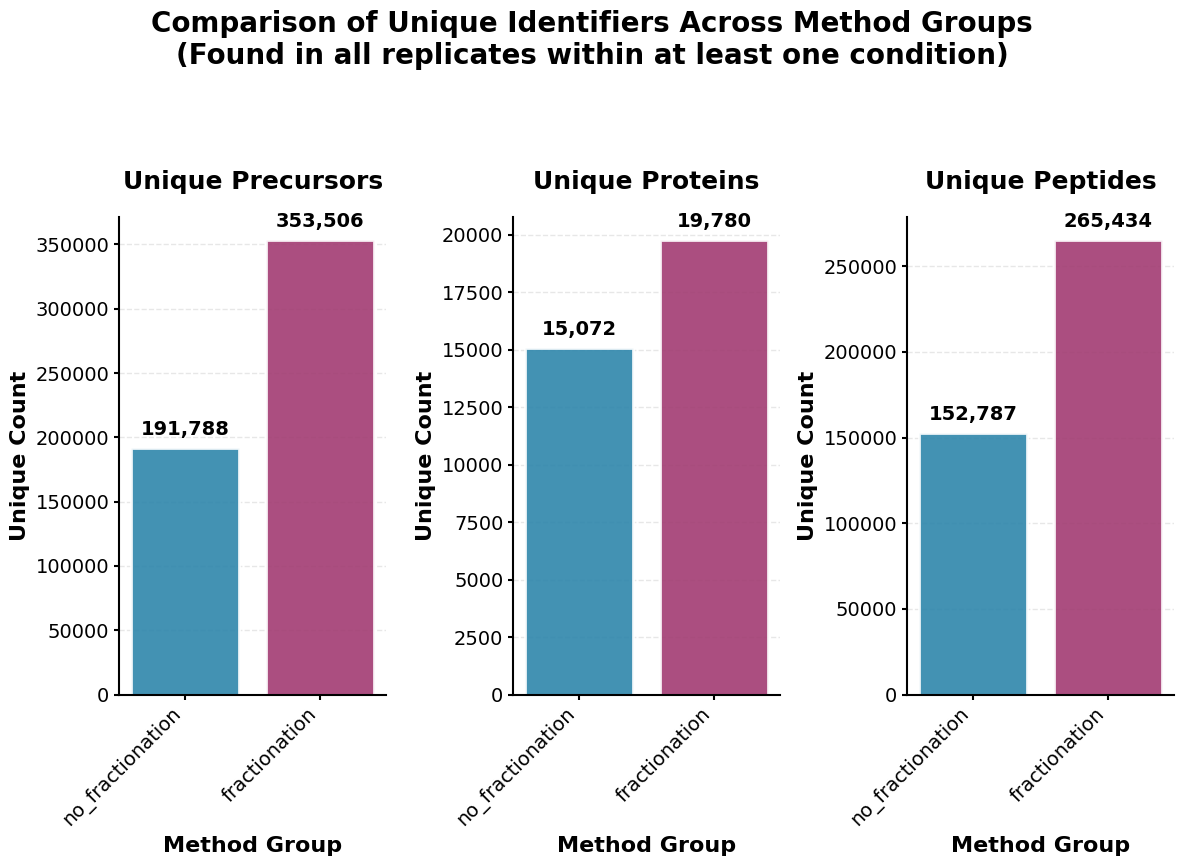

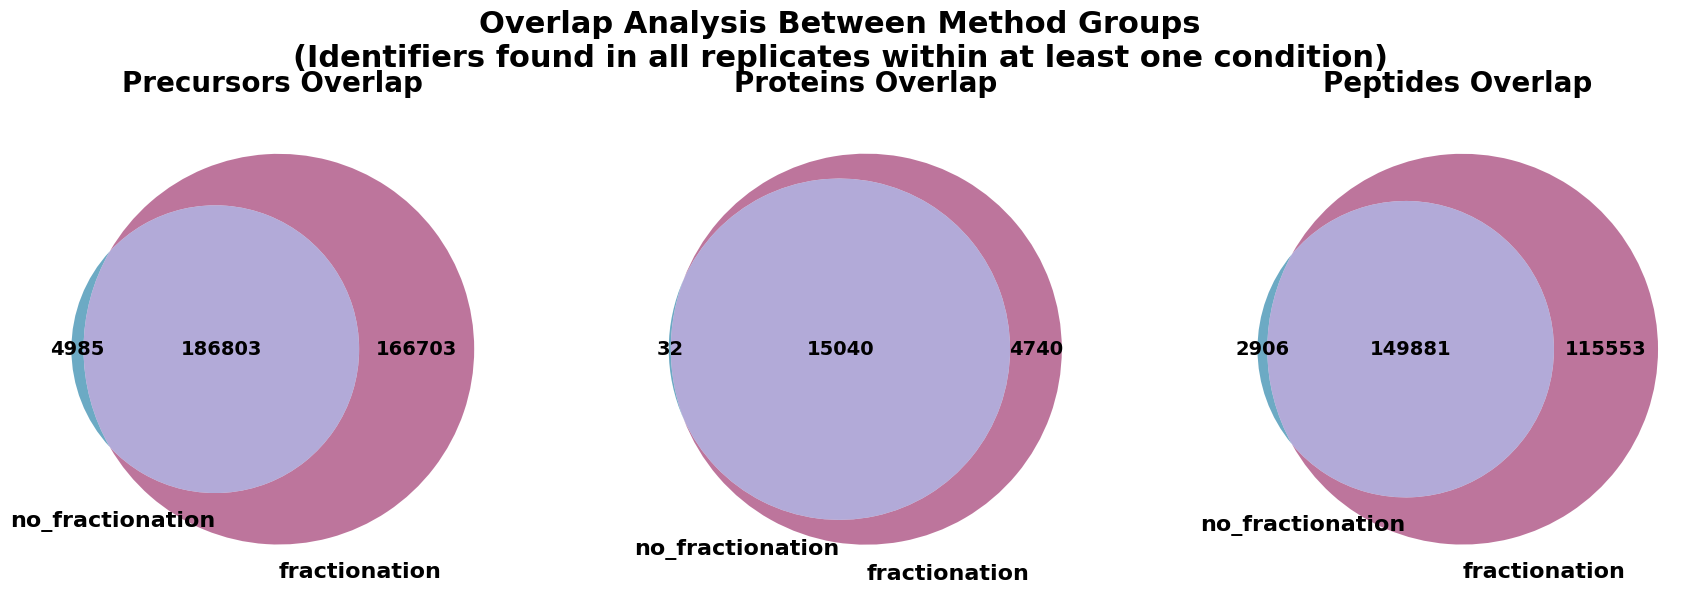

In [43]:
summary_df, fig, fig_venn, saved_files, method_identifiers = compare_unique_identifiers_across_methods(
    experiment_dict,
    output_dir=output_dir
)

Loading FASTA files...
  HUMAN: 20590 proteins
  YEAST: 6733 proteins
  ARATH: 27435 proteins

=== Analyzing no_fractionation ===

  HUMAN:
    Total peptide-protein pairs: 81038
    Example gene name mappings:
      P36952 → SPB5_HUMAN [✓]
      P55957 → BID_HUMAN [✓]
      P19388 → RPAB1_HUMAN [✓]
    Unique proteins: 6820
    Unique peptides: 81038
    Proteins found in FASTA: 6820/6820 (0 not found)
    Peptides per protein: mean=11.9, median=8.0, max=250
    Coverage per protein: mean=28.5%, median=25.4%

  YEAST:
    Total peptide-protein pairs: 46968
    Example gene name mappings:
      O74700 → TIM9_YEAST [✓]
      Q99385 → VCX1_YEAST [✓]
      P21576 → VPS1_YEAST [✓]
    Unique proteins: 4038
    Unique peptides: 46968
    Proteins found in FASTA: 4038/4038 (0 not found)
    Peptides per protein: mean=11.6, median=8.0, max=149
    Coverage per protein: mean=29.8%, median=26.4%

  ARATH:
    Total peptide-protein pairs: 22938
    Example gene name mappings:
      Q8GRX2 → Q8GR

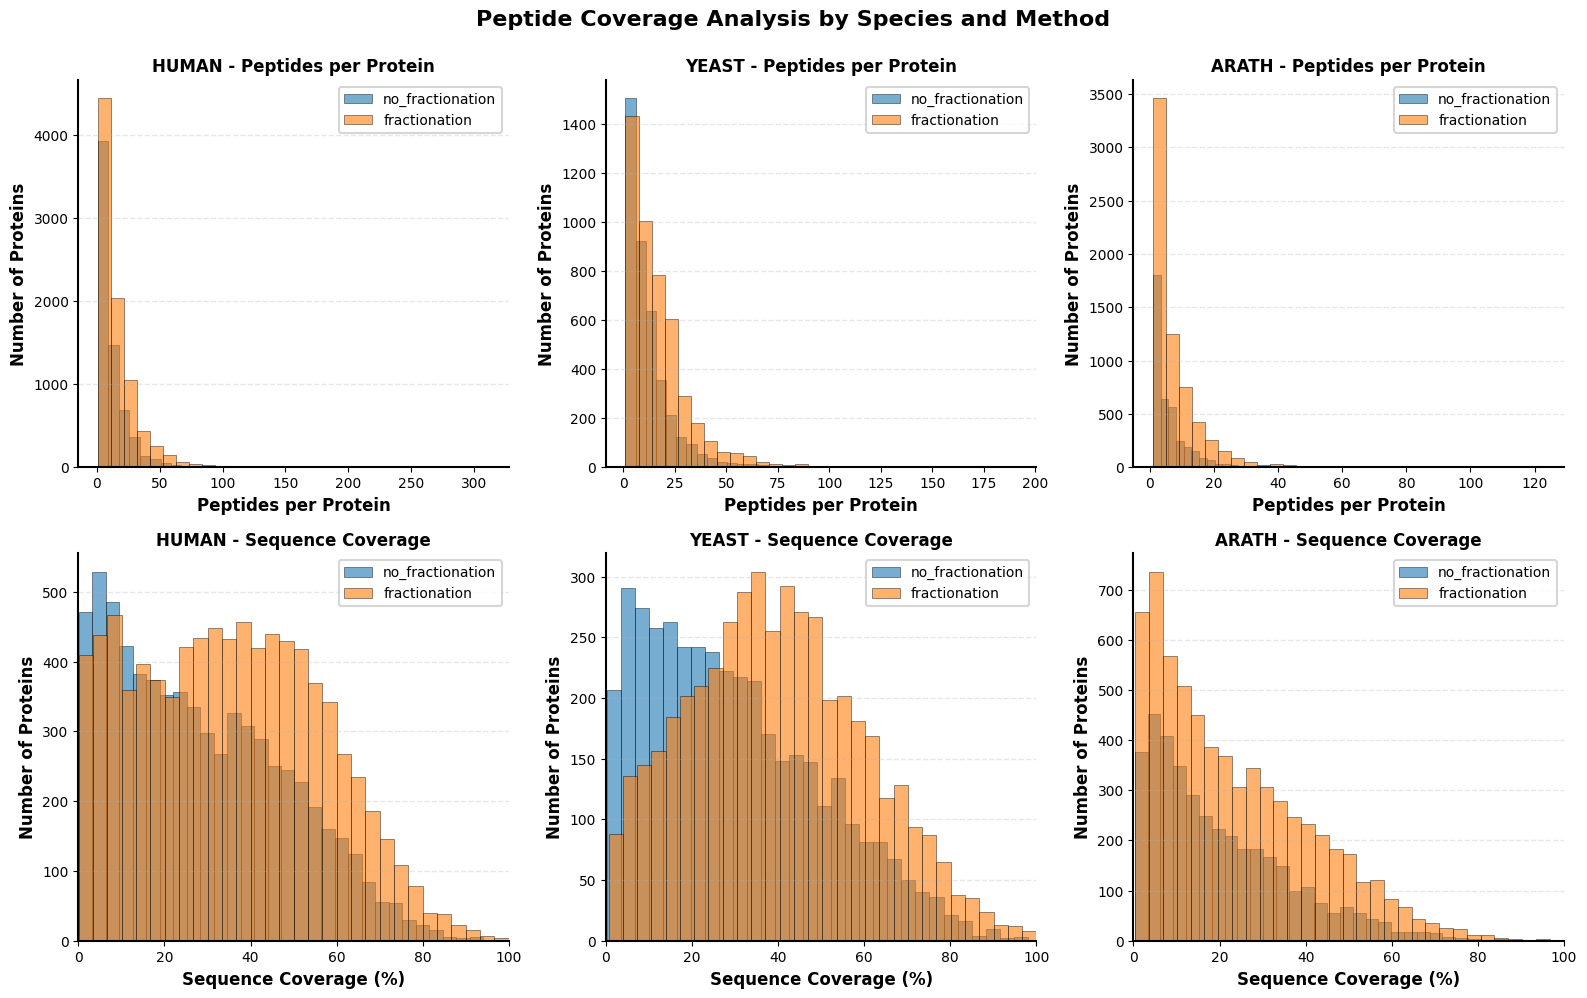

In [44]:
coverage_summary, coverage_fig, coverage_files = analyze_species_coverage(
    method_identifiers=method_identifiers,
    fasta_human=r'Z:\Search_settings\fasta\Human.fasta',
    fasta_yeast=r'Z:\Search_settings\fasta\S_cerivisae.fasta',
    fasta_arath=r'Z:\Search_settings\fasta\Arabidopsis.fasta',
    output_dir=output_dir
)

In [46]:
frac_yeast_pept_ss = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\no_fractionation_YEAST_peptides_per_protein.csv')
frac_yeast_pept_frac = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\fractionation_YEAST_peptides_per_protein.csv')
###
###
frac_human_pept_ss = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\no_fractionation_HUMAN_peptides_per_protein.csv')
frac_human_pept_frac = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\fractionation_HUMAN_peptides_per_protein.csv')
###
###
frac_ara_pept_ss = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\no_fractionation_ARATH_peptides_per_protein.csv')
frac_ara_pept_frac = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\fractionation_ARATH_peptides_per_protein.csv')

In [47]:
frac_yeast_cov_ss = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\no_fractionation_YEAST_coverage_per_protein.csv')
frac_yeast_cov_frac = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\fractionation_YEAST_coverage_per_protein.csv')
###
###
frac_human_cov_ss = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\no_fractionation_HUMAN_coverage_per_protein.csv')
frac_human_cov_frac = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\fractionation_HUMAN_coverage_per_protein.csv')
###
###
frac_ara_cov_ss = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\no_fractionation_ARATH_coverage_per_protein.csv')
frac_ara_cov_frac = pd.read_csv(r'Z:\SPEC\submission\raw\figure2\fractionation_ARATH_coverage_per_protein.csv')

In [48]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=frac_yeast_cov_ss.iloc[:,0].tolist(),
    xbins=dict(
        start=0,
        end=100,
        size=3 
    ),
    marker=dict(
        color='#98463f',
        line=dict(color='black', width=1)
    )
))
fig.add_trace(go.Histogram(
    x=frac_yeast_cov_frac.iloc[:,0].tolist(),
    name='Dataset 2', 
    xbins=dict(start=0, end=100, size=3),
    marker=dict(
        color='#2b0948',
        line=dict(color='black', width=1)
    ),
    opacity=0.85
))
fig.update_layout(
    width=600,
    height=600,
    template='none',
    xaxis_title='Coverage (%)',
    yaxis_title='Count',
    barmode='overlay',
    showlegend=False
)
fig.add_vline(x = np.median(frac_yeast_cov_ss.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#98463f'})
fig.add_vline(x = np.median(frac_yeast_cov_frac.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#000814'})
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2e1.pdf', width = 600, height = 600)

In [49]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=frac_human_cov_ss.iloc[:,0].tolist(),
    xbins=dict(
        start=0,
        end=100,
        size=3 
    ),
    marker=dict(
        color='#98463f',
        line=dict(color='black', width=1)
    )
))
fig.add_trace(go.Histogram(
    x=frac_human_cov_frac.iloc[:,0].tolist(),
    name='Dataset 2', 
    xbins=dict(start=0, end=100, size=3),
    marker=dict(
        color='#2b0948',
        line=dict(color='black', width=1)
    ),
    opacity=0.85
))
fig.update_layout(
    width=600,
    height=600,
    template='none',
    xaxis_title='Coverage (%)',
    yaxis_title='Count',
    barmode='overlay',
    showlegend=False
)
fig.add_vline(x = np.median(frac_human_cov_ss.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#98463f'})
fig.add_vline(x = np.median(frac_human_cov_frac.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#000814'})

#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2e2.pdf', width = 600, height = 600)

In [50]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=frac_ara_cov_ss.iloc[:,0].tolist(),
    xbins=dict(
        start=0,
        end=100,
        size=3 
    ),
    marker=dict(
        color='#98463f',
        line=dict(color='black', width=1)
    )
))
fig.add_trace(go.Histogram(
    x=frac_ara_cov_frac.iloc[:,0].tolist(),
    name='Dataset 2', 
    xbins=dict(start=0, end=100, size=3),
    marker=dict(
        color='#2b0948',
        line=dict(color='black', width=1)
    ),
    opacity=0.85
))
fig.update_layout(
    width=600,
    height=600,
    template='none',
    xaxis_title='Coverage (%)',
    yaxis_title='Count',
    barmode='overlay',
    showlegend=False
)
fig.add_vline(x = np.median(frac_ara_cov_ss.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#98463f'})
fig.add_vline(x = np.median(frac_ara_cov_frac.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#000814'})
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2e3.pdf', width = 600, height = 600)

In [51]:
fig = go.Figure()
fig.add_trace(go.Box(y = frac_yeast_pept_ss.iloc[:,0].tolist(), marker_color = '#98463f'))
fig.add_trace(go.Box(y = frac_yeast_pept_frac.iloc[:,0].tolist(), marker_color = '#2b0948'))
fig.update_layout(
    width=600,
    height=600,
    template='none',
    showlegend=False
)
fig.add_hline(y = np.nanmedian(frac_yeast_pept_ss.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#98463f'})
fig.add_hline(y = np.nanmedian(frac_yeast_pept_frac.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#000814'})
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2e4.pdf', width = 600, height = 600)

In [52]:
fig = go.Figure()
fig.add_trace(go.Box(y = frac_human_pept_ss.iloc[:,0].tolist(), marker_color = '#98463f'))
fig.add_trace(go.Box(y = frac_human_pept_frac.iloc[:,0].tolist(), marker_color = '#2b0948'))
fig.update_layout(
    width=600,
    height=600,
    template='none',
    showlegend=False
)
fig.add_hline(y = np.nanmedian(frac_human_pept_ss.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#98463f'})
fig.add_hline(y = np.nanmedian(frac_human_pept_frac.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#000814'})
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2e5.pdf', width = 600, height = 600)

In [53]:
fig = go.Figure()
fig.add_trace(go.Box(y = frac_human_pept_ss.iloc[:,0].tolist(), marker_color = '#98463f'))
fig.add_trace(go.Box(y = frac_human_pept_frac.iloc[:,0].tolist(), marker_color = '#2b0948'))
fig.update_layout(
    width=600,
    height=600,
    template='none',
    showlegend=False
)
fig.add_hline(y = np.nanmedian(frac_human_pept_ss.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#98463f'})
fig.add_hline(y = np.nanmedian(frac_human_pept_frac.iloc[:,0].tolist()), line={'dash': 'dash', 'width': 3, 'color': '#000814'})
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_2e5.pdf', width = 600, height = 600)